In [12]:
import seaborn as sns

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.model_selection import GridSearchCV
import squarify
import time
import os
from PIL import Image, ImageDraw
import imgkit

--------

## 1. General

#### 1.1 Handling weird values
- Check decriptive statistics
- Check missing values

In [32]:
ksdf = pd.read_csv('/home/mosto/Documents/insight/kickstarter-project/datasets_273211_566171_kickstarter.csv', sep=',', engine='python')
ksdf.head()

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",failed


In [172]:
ksdf.describe()

,Unnamed: 0,id,backers_count,goal,usd_pledged,static_usd_rate,year,month,day,hour,days_to_deadline,goal_USD,blurb_length
count,430938.000000,4.309380e+05,430938.000000,4.309380e+05,4.309380e+05,430938.000000,430938.000000,430938.000000,430938.000000,430938.0,430938.000000,4.309380e+05,430938.000000
mean,2037.576459,1.073657e+09,138.950185,4.883624e+04,1.210324e+04,1.007943,2015.554108,6.192097,15.078280,0.0,34.295223,3.971246e+04,18.938532
std,1184.188600,6.194721e+08,1035.447040,1.103247e+06,1.047045e+05,0.228602,2.184330,3.371953,8.851132,0.0,12.380808,1.008321e+06,5.060098
min,0.000000,8.624000e+03,0.000000,1.000000e-02,0.000000e+00,0.008771,2009.000000,1.000000,1.000000,0.0,1.000000,1.000000e-02,1.000000
25%,1009.000000,5.365615e+08,2.000000,2.000000e+03,5.500000e+01,1.000000,2014.000000,3.000000,7.000000,0.0,30.000000,2.000000e+03,16.000000
50%,2026.000000,1.074770e+09,17.000000,5.000000e+03,9.220000e+02,1.000000,2016.000000,6.000000,15.000000,0.0,30.000000,5.000000e+03,20.000000
75%,3065.000000,1.609176e+09,71.000000,1.600000e+04,5.146987e+03,1.000000,2017.000000,9.000000,23.000000,0.0,38.000000,1.500000e+04,22.000000
max,4095.000000,2.147476e+09,219382.000000,1.000000e+08,2.033899e+07,1.716408,2019.000000,12.000000,31.000000,0.0,93.000000,1.523501e+08,41.000000


In [173]:
import pandas as pd
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [174]:
df = ksdf

In [181]:
df.binary_state

0         0
1         0
2         0
3         0
4         0
         ..
430933    1
430934    1
430935    0
430936    0
430937    1
Name: binary_state, Length: 430938, dtype: int64

In [182]:
cleanup_nums = {'failed':0,'successful':1}

In [ ]:
df.binary_state.replace(cleanup_nums, inplace=True)

In [184]:
df.head()

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",0
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",0
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",0
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",0
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",0


In [206]:
X = df.loc[:,['days_to_deadline']]
y = df.binary_state

In [207]:
print(X.shape)
print(y.shape)

(430938, 1)
(430938,)


In [208]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(solver='lbfgs')

In [209]:
from sklearn.model_selection import cross_val_score
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.6054444272602181

In [197]:
y.value_counts(normalize=True)

0    0.596877
1    0.403123
Name: binary_state, dtype: float64

In [210]:
# dummy encoding of categorical features
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)

In [265]:
ohe.fit_transform(df[['category_slug']])

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [266]:
ohe.categories_

[array(['art', 'comics', 'crafts', 'dance', 'design', 'fashion',
        'film & video', 'food', 'games', 'journalism', 'music',
        'photography', 'publishing', 'technology', 'theater'], dtype=object)]

In [267]:
X = df.loc[:,['days_to_deadline','goal','category_slug','blurb_length','month','day','backers_count']]

In [268]:
X.head()

,days_to_deadline,goal,category_slug,blurb_length,month,day,backers_count
0,42,2000.0,art,9,3,19,1
1,10,10.0,art,21,7,17,2
2,30,900.0,art,12,7,30,0
3,20,900.0,art,17,5,11,0
4,30,15000.0,art,26,2,6,1


In [250]:
# use when different features need different preprocessing
from sklearn.compose import make_column_transformer

In [274]:
column_trans = make_column_transformer(
    (OneHotEncoder(), ['category_slug']),
    remainder='passthrough')

In [275]:
column_trans.fit_transform(X)

array([[  1.,   0.,   0., ...,   3.,  19.,   1.],
       [  1.,   0.,   0., ...,   7.,  17.,   2.],
       [  1.,   0.,   0., ...,   7.,  30.,   0.],
       ...,
       [  0.,   1.,   0., ...,   6.,   7., 260.],
       [  0.,   1.,   0., ...,   6.,   4.,   7.],
       [  0.,   0.,   0., ...,   5.,  21.,  62.]])

In [271]:
# chain sequential steps together
from sklearn.pipeline import make_pipeline

In [272]:
pipe = make_pipeline(column_trans, logreg)

In [273]:
# cross-validate the entire process
# thus, preprocessing occurs within each fold of cross-validation
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.8100771660521859

In [115]:
#let's look at the different categories
print(ksdf['category_name'].value_counts())

Product Design    24627
Tabletop Games    21082
Video Games       13770
Apparel           12534
Apps              11255
                  ...  
Quilts              125
Letterpress         123
Residencies         122
Chiptune             60
Taxidermy            16
Name: category_name, Length: 159, dtype: int64


In [103]:
print(ksdf['category_name'].value_counts().count())

159


In [140]:
print(ksdf['category_slug'].value_counts().count())

15


In [119]:
category_count=ksdf['category_name'].value_counts()
category_count

Product Design    24627
Tabletop Games    21082
Video Games       13770
Apparel           12534
Apps              11255
                  ...  
Quilts              125
Letterpress         123
Residencies         122
Chiptune             60
Taxidermy            16
Name: category_name, Length: 159, dtype: int64

In [164]:
#Make a copy df which will have the select categories encoded 
cat_encoded_ksdf=ksdf.copy()

In [165]:
#encoding category_name
print('number of categories: '+str(ksdf['category_name'].value_counts().count()))
labels = ksdf['category_name'].astype('category').cat.categories.tolist()
replace_map_comp_cat = {'category_name' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp, inplace=True)
#print(replace_map_comp_cat)

number of categories: 159


In [166]:
#encoding slug
print('number of categories: '+str(ksdf['category_slug'].value_counts().count()))
labels = ksdf['category_slug'].astype('category').cat.categories.tolist()
replace_map_comp_slug = {'category_slug' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_slug, inplace=True)
print(replace_map_comp_slug)

number of categories: 15
{'category_slug': {'art': 1, 'comics': 2, 'crafts': 3, 'dance': 4, 'design': 5, 'fashion': 6, 'film & video': 7, 'food': 8, 'games': 9, 'journalism': 10, 'music': 11, 'photography': 12, 'publishing': 13, 'technology': 14, 'theater': 15}}


In [167]:
#encoding location_state
print('number of categories: '+str(ksdf['location_state'].value_counts().count()))
labels = ksdf['location_state'].astype('category').cat.categories.tolist()
replace_map_comp_loc = {'location_state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_loc, inplace=True)
#print(replace_map_comp_loc)

number of categories: 1349


In [163]:
#encoding binary_state .. success or failed
print('number of categories: '+str(ksdf['binary_state'].value_counts().count()))
labels = ksdf['binary_state'].astype('category').cat.categories.tolist()
replace_map_comp_state = {'binary_state' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
cat_encoded_ksdf.replace(replace_map_comp_state, inplace=True)
print(replace_map_comp_state)

number of categories: 2
{'binary_state': {'failed': 1, 'successful': 2}}


/home/mosto/miniconda3/envs/kickstarter/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


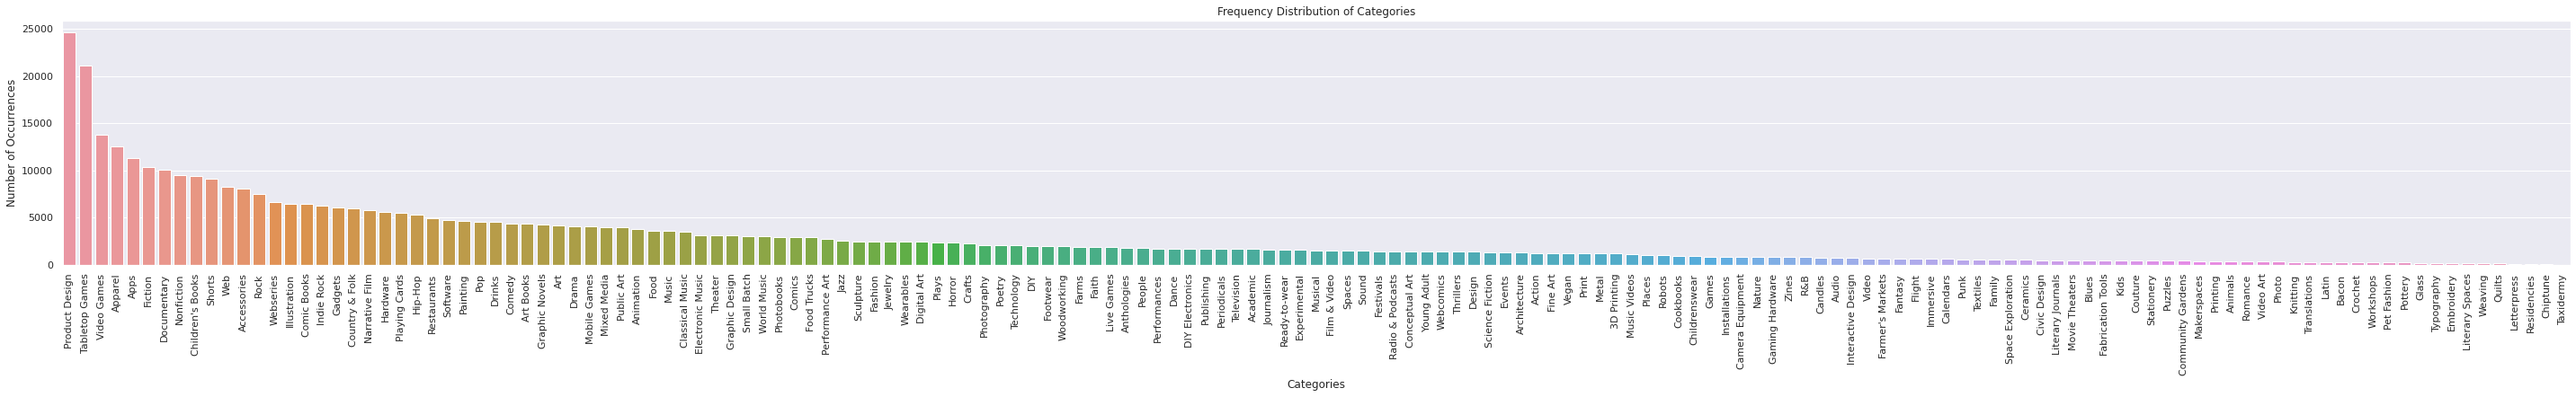

In [126]:
#Visualize Category Histogram of all campaigns 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(50,5))
category_count = ksdf['category_name'].value_counts()
sns.set(style="darkgrid")
chart=sns.barplot(category_count.index, category_count.values, alpha=1)
#sns.set(rc={'figure.figsize':(20,8.27)})
plt.title('Frequency Distribution of Categories')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Categories', fontsize=12)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [160]:
# Add pledged_ratio column
cat_encoded_ksdf['pledged_ratio'] = cat_encoded_ksdf['usd_pledged']/ cat_encoded_ksdf['goal_USD']

In [161]:
table=cat_encoded_ksdf.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430938 entries, 0 to 430937
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 430938 non-null  int64  
 1   id                         430938 non-null  int64  
 2   backers_count              430938 non-null  int64  
 3   blurb                      430938 non-null  object 
 4   currency                   430938 non-null  object 
 5   goal                       430938 non-null  float64
 6   launched_at                430938 non-null  object 
 7   deadline                   430938 non-null  object 
 8   location.country           429843 non-null  object 
 9   name                       430934 non-null  object 
 10  usd_pledged                430938 non-null  float64
 11  slug                       430938 non-null  object 
 12  spotlight                  430938 non-null  bool   
 13  staff_pick                 43

In [ ]:
#Let's grab the column names we might care about
names=['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count','month','day','hour','category_name','category_slug','location_state']

In [133]:
cat_encoded_ksdf=ksdf.copy()
cat_encoded_ksdf.head()

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0000,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0000,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0000,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0000,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.6545,Digital Art,art,26,County,GB,England,"Essex, UK",failed


In [134]:
cat_encoded_ksdf.replace(replace_map_comp, inplace=True)

In [135]:
cat_encoded_ksdf

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.00000,39,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.00000,39,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.00000,39,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.00000,39,art,17,Town,US,CA,"Sacramento, CA",failed
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.65450,39,art,26,County,GB,England,"Essex, UK",failed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
430933,2948,124106286,232,A Lovecraftian school for the naughty offsprin...,GBP,4000.0,2018-05-14 15:51:11,2018-06-15 22:59:00,GB,Cthulhu Kids- All Ages Cosmic Terror & Mythos ...,...,32,5417.85184,26,comics,21,Town,GB,England,"Bournemouth, UK",successful
430934,2969,665158050,215,The most versatile Camping & Survival Stove on...,USD,4800.0,2018-05-17 17:13:41,2018-06-20 00:00:00,US,SIEGE STOVE: The Ultimate Camping & Survival S...,...,33,4800.00000,114,design,19,Town,US,CA,"Walnut Creek, CA",successful
430935,534,1947126385,260,"Jim Starlin, creator of Thanos, Gamora, Drax, ...",USD,26500.0,2018-06-07 08:23:15,2018-07-12 15:59:00,US,Cosmic Master Jim Starlin's Art Book and Illus...,...,35,26500.00000,26,comics,20,Town,US,NY,"Tonawanda, NY",failed
430936,541,1535298356,7,Adrik Koznof is an FBI Forensic Chemist and co...,USD,1500.0,2018-06-04 13:05:31,2018-07-04 13:05:31,US,Adrik Koznof THE CRIME FIGHTING CHEMIST,...,30,1500.00000,26,comics,21,Town,US,MI,"Grand Rapids, MI",failed


In [136]:
cat_encoded_ksdf.head()

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0000,39,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0000,39,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0000,39,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0000,39,art,17,Town,US,CA,"Sacramento, CA",failed
4,4,1260075071,1,I want to bring colour to the world in my own ...,GBP,15000.0,2015-02-06 21:52:02,2015-03-08 20:52:02,GB,North Africa art project - my dream,...,30,22801.6545,39,art,26,County,GB,England,"Essex, UK",failed


In [18]:
ksdf.isnull().sum()

Unnamed: 0                      0
id                              0
backers_count                   0
blurb                           0
currency                        0
goal                            0
launched_at                     0
deadline                        0
location.country             1095
name                            4
usd_pledged                     0
slug                            0
spotlight                       0
staff_pick                      0
static_usd_rate                 0
state                           0
year                            0
month                           0
day                             0
hour                            0
days_to_deadline                0
goal_USD                        0
category_name                   0
category_slug                   0
blurb_length                    0
location_type                   0
location_country                0
location_state                  0
location_displayable_name       0
binary_state  

In [41]:
ksdf['backers_count'].max()

219382

<AxesSubplot:>

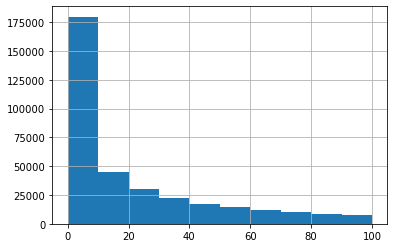

In [46]:
ksdf['backers_count'].hist(range=[0, 100])


<AxesSubplot:>

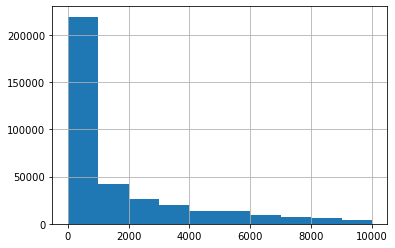

In [49]:
ksdf['usd_pledged'].hist(range=[0,10000])

In [27]:
ksdf['backers_count'].shape

(430938,)

According to the description of data:
- **usd pledged** -> USD conversion made by KS for the pledged value
- **usd_pledged_real** ->  USD conversion made by fixer.io api

We will use **usd_pledged_real** for further analysis

In [19]:
# Check missing values in the column "name"
ksdf[pd.isnull(ksdf['name'])].index

Int64Index([14749, 51866, 158009, 253217], dtype='int64')

In [21]:
ksdf[ksdf.index == 14749]
#ksdf[ksdf.index == 51866]

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
14749,2461,796533179,5,-,USD,35000.0,2011-11-06 22:55:55,2011-12-05 04:59:00,US,NaN,...,28,35000.0,Painting,art,1,Town,US,IN,"Milan, IN",failed


In [72]:
ksfailed=ksdf[ksdf['binary_state'] == 'failed']
ksfailed=ksfailed[ksfailed['currency'] == 'USD']
ksfailed.shape

(174996, 30)

In [ ]:
ksfailed=ksfailed[ksfailed['currency'] == 'USD']

In [73]:
ksfailed.head()

,Unnamed: 0,id,backers_count,blurb,currency,goal,launched_at,deadline,location.country,name,...,days_to_deadline,goal_USD,category_name,category_slug,blurb_length,location_type,location_country,location_state,location_displayable_name,binary_state
0,0,857125548,1,Exploring paint and its place in a digital world.,USD,2000.0,2015-03-19 22:34:57,2015-04-30 23:12:00,US,Remix,...,42,2000.0,Digital Art,art,9,Town,US,NY,"New York, NY",failed
1,1,1038659700,2,Mike Fassio wants a side-by-side photo of me a...,USD,10.0,2014-07-17 01:55:07,2014-07-27 01:55:07,US,Photo of Grant and Hazel eating cake with bare...,...,10,10.0,Digital Art,art,21,Town,US,WA,"Seattle, WA",failed
2,2,1238331911,0,I need your help to get a nice graphics tablet...,USD,900.0,2014-07-30 16:29:13,2014-08-29 16:29:13,US,Minecraft Digital Art/Animations,...,30,900.0,Digital Art,art,12,Town,US,VA,"Moneta, VA",failed
3,3,189217262,0,I want to create a Nature Photograph Series of...,USD,900.0,2015-05-11 16:09:11,2015-05-31 16:09:11,US,Sacramento Nature Photograph Series,...,20,900.0,Digital Art,art,17,Town,US,CA,"Sacramento, CA",failed
6,6,1653837117,2,Help me raise money to get a drawing tablet,USD,2900.0,2015-04-06 16:09:42,2015-05-16 16:09:42,US,I love Drawing,...,40,2900.0,Digital Art,art,9,Town,US,CA,"San Diego, CA",failed


In [76]:
# Add pledged_ratio column
ksfailed['pledged_ratio'] = ksfailed['usd_pledged']/ ksfailed['goal_USD']

<AxesSubplot:>

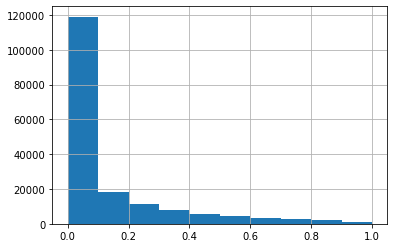

In [78]:
ksfailed['pledged_ratio'].hist()

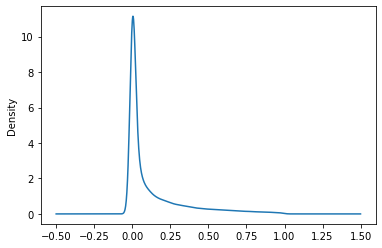

In [77]:
ksfailed['pledged_ratio'].plot(kind= 'density')
plt.show()

In [92]:
names=['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count']

In [93]:
len(names)

6

In [97]:
data=ksfailed_analysis=ksfailed[['pledged_ratio','usd_pledged','goal_USD','blurb_length','days_to_deadline','backers_count','month','day','hour',]].copy()

<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 3600x3600 with 0 Axes>

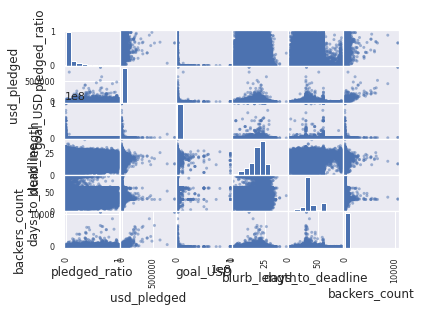

In [171]:
plt.figure(figsize=(50,50))
chart=pd.plotting.scatter_matrix(data)
#chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
#chart.set_yticklabels(chart.get_yticklabels(), rotation=90)
plt.show

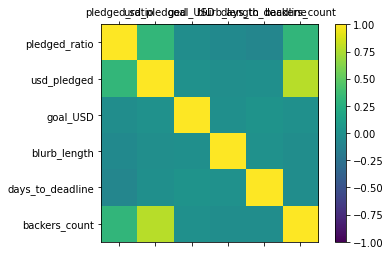

In [100]:
correlations = data.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,6,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()

Even though there are some missing values in **name**, those are real projects. We will keep them.

In [60]:
ksfailed['backers_count'].sort_values(ascending=False)

400913    10641
399082    10627
319274     8613
77814      6550
77604      6287
          ...  
69399         0
69398         0
323698        0
323699        0
302498        0
Name: backers_count, Length: 257217, dtype: int64

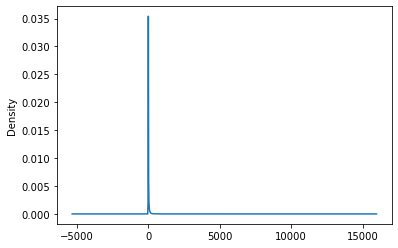

In [64]:
ksfailed['backers_count'].plot(kind= 'density')
plt.show()

#### 1.2 Modify data columns
- According to previous cell, I will drop **usd pledged** columns
- Add **pledged_ratio** column that follows the rule:
 > pledged_ratio = usd_pledged_real/ usd_goal_real
- Retrieve **year** & **date** and transform the information as a new column **time** that follows the rule:
> `(year - 2009) * 12 + month`
>>Since 2009 seems to be the first year that contains meaningful data, we will use this alorithm to get timely manner information
- Generate a new dataframe **ksdf_year** for cross-year comparison

In [7]:
# Delete usdf pledged column
ksdf.drop(['usd pledged'], axis = 1, inplace = True)

In [8]:
# Add pledged_ratio column
ksdf['pledged_ratio'] = ksdf['usd_pledged_real']/ ksdf['usd_goal_real']

In [9]:
def year_cut(string):
    return string[0:4]

def month_cut(string):
    return string[5:7]

ksdf['year'] = ksdf['launched_at'].apply(year_cut)
ksdf['month'] = ksdf['launched_at'].apply(month_cut)

ksdf['year'] = ksdf['year'].astype(int)
ksdf['month'] = ksdf['month'].astype(int)
ksdf['time'] = (ksdf['year'].values - 2009)*12 + (ksdf['month']).astype(int)

In [10]:
print (ksdf.columns)

Index(['Unnamed: 0', 'id', 'backers_count', 'blurb', 'currency', 'goal',
       'launched_at', 'deadline', 'location.country', 'name', 'usd_pledged',
       'slug', 'spotlight', 'staff_pick', 'static_usd_rate', 'state', 'year',
       'month', 'day', 'hour', 'days_to_deadline', 'goal_USD', 'category_name',
       'category_slug', 'blurb_length', 'location_type', 'location_country',
       'location_state', 'location_displayable_name', 'binary_state', 'time'],
      dtype='object')


In [11]:
ksdf['year'].value_counts()

2016    82271
2017    78873
2018    68837
2015    57302
2014    46375
2013    27328
2012    26453
2019    19435
2011    16165
2010     6962
2009      937
Name: year, dtype: int64

In [15]:
ksdf_year = {}
for year in range(2009, 2020):
    ksdf_year[year] = ksdf[ksdf['year'] == year]['year'].count()

In [16]:
ksdf_year = pd.Series(ksdf_year)
ksdf_year = pd.DataFrame(ksdf_year)
ksdf_year = ksdf_year.rename(columns = {0: "counts"})
ksdf_year

,counts
2009,937
2010,6962
2011,16165
2012,26453
2013,27328
2014,46375
2015,57302
2016,82271
2017,78873
2018,68837


#### 1.3 Number of projects proposed/  successful rate
- Overall number of proposed projects
- Overall successful rate
- Cross year comparison of above 2 items

In [17]:
ksdf['binary_state'].value_counts()

failed        257217
successful    173721
Name: binary_state, dtype: int64

In [21]:
total=np.sum(ksdf['binary_state'].value_counts())
total

430938

In [36]:
f_ratio=ksdf['binary_state'].value_counts()[0]/total
s_ratio=ksdf['binary_state'].value_counts()[1]/total

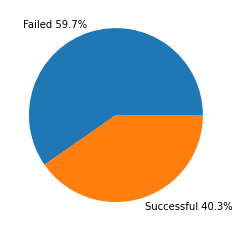

In [55]:
plt.pie(ksdf['binary_state'].value_counts(),labels=['Failed '+str(np.round(f_ratio*100,1))+'%','Successful '+str(np.round(s_ratio*100,1))+'%'])
plt.savefig('pie.png')

In [43]:
173721/430938

0.40312295504225665

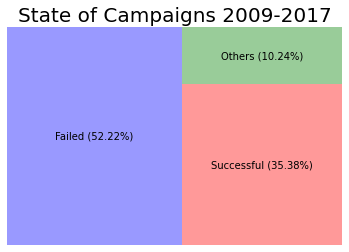

In [16]:
squarify.plot(sizes=[197719,133956, (38779 + 3562 + 2799 + 1846)], 
              label=["Failed (52.22%)", "Successful (35.38%)", "Others (10.24%)",], color=["blue","red","green"], alpha=.4 )
plt.title('State of Campaigns 2009-2017', fontsize = 20)
plt.axis('off')
plt.show()

In [17]:
success_timely = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['year'] == year) & (ksdf['state'] == 'successful')]['state'])
    overall = len (ksdf[ksdf['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

Year =  2009 43.566591422121896 %
Year =  2010 43.66384637322939 %
Year =  2011 46.38868773106681 %
Year =  2012 43.46410785861776 %
Year =  2013 43.28777507747876 %
Year =  2014 31.156542918296555 %
Year =  2015 27.129366106080205 %
Year =  2016 32.81687185226637 %
Year =  2017 35.367816091954026 %
Year =  2018 0.0 %


In [18]:
failed_timely = []

for year in range(2009, 2019):
    success = len (ksdf[(ksdf['year'] == year) & (ksdf['state'] == 'failed')]['state'])
    overall = len (ksdf[ksdf['year'] == year]['year'])
    ratio = success/ overall
    success_timely.append(ratio)
    print ("Year = ",year, ratio * 100, '%')

Year =  2009 45.146726862302486 %
Year =  2010 47.38092974617359 %
Year =  2011 45.27194420093761 %
Year =  2012 50.01336086481234 %
Year =  2013 48.35120733094023 %
Year =  2014 56.38644918444166 %
Year =  2015 57.3104786545925 %
Year =  2016 53.382064913262454 %
Year =  2017 47.810344827586206 %
Year =  2018 0.0 %


In [19]:
ksdf[ksdf['year'] == 2018]['state'].value_counts()

live        122
canceled      2
Name: state, dtype: int64

In [20]:
ksdf_year['success_ratio'] = success_timely
ksdf_year.head

ValueError: Length of values does not match length of index

In [21]:
ksdf[ksdf['year'] == 2017]['backers'].count()

52200

In [22]:
backers_year = {}
for year in range(2009, 2019):
    backers_count = ksdf[ksdf['year'] == year]['backers'].sum()
    backers_year[year] = backers_count

ksdf_year['backers'] = pd.Series(backers_year)

In [23]:
ksdf_year

,counts,backers
2009,1329,43758
2010,10519,406875
2011,26237,1396473
2012,41165,4343786
2013,44851,6292568
2014,67745,6194576
2015,77300,7512058
2016,57184,7148604
2017,52200,6653360
2018,124,1161


/home/mosto/.local/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


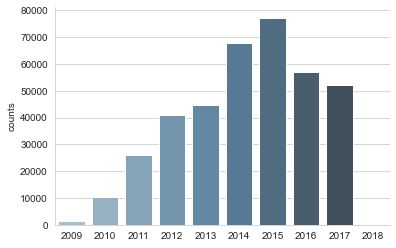

In [24]:
# Cross-year proposed projects
sns.set_style("whitegrid")
sns.barplot(ksdf_year['counts'].index, y= ksdf_year['counts'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

In [25]:
# Cross-year success ratio
sns.set_style("whitegrid")
sns.barplot(ksdf_year['success_ratio'].index, y= ksdf_year['success_ratio'], data = ksdf_year,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

KeyError: 'success_ratio'

In [ ]:
sns.set_style("whitegrid")
sns.barplot(ksdf_year['backers'].index, y= ksdf_year['backers'] ,
            palette="Blues_d", saturation = 0.5)
sns.despine(right = True, top = True)

#### 1.4 Statistics of pledged amount
- Descripitive statistics of pledged amount
- Pledged amount comparison by state (successful/ failed/ others)

In [ ]:
sum_pledged = ksdf['usd_pledged_real'].sum()
print (sum_pledged)

In [ ]:
ksdf['usd_pledged_real'].describe()

In [ ]:
# Ratio of successful/ failed / others
success_pledged = ksdf[ksdf['state'] == "successful"]['usd_pledged_real'].sum()
fail_pledged = ksdf[ksdf['state'] == 'failed']['usd_pledged_real'].sum()
others_pledged = (ksdf[ksdf['state'] == 'canceled']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'undefined']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'live']['usd_pledged_real'].sum() +
                  ksdf[ksdf['state'] == 'suspended']['usd_pledged_real'].sum())

print (success_pledged, success_pledged/ sum_pledged * 100, '%')
print (fail_pledged, fail_pledged/ sum_pledged * 100, '%')
print (others_pledged, others_pledged/ sum_pledged * 100, '%')

In [ ]:
squarify.plot(sizes=[3036889045.99, 261108466.05, 132263736.79], 
              label=["Successful (88.53%)", "Failed (7.61%)", "Others (3.86%)",], color=["red","blue", "green"], alpha=.4 )
plt.title('Pledged Amount', fontsize = 20)
plt.axis('off')
plt.show()

In [ ]:
success_projects = ksdf[ksdf['state'] == 'successful']['state'].count()
fail_projects  = ksdf[ksdf['state'] == 'failed']['state'].count()
others_projects  = (
    ksdf[ksdf['state'] == 'canceled']['state'].count() +
    ksdf[ksdf['state'] == 'live']['state'].count() +
    ksdf[ksdf['state'] == 'undefined']['state'].count() +
    ksdf[ksdf['state'] == 'suspended']['state'].count())

print ("Average pledged amount per successful project = ",success_pledged/success_projects)
print ("Average pledged amount per failed project = ",fail_pledged/ fail_projects)
print ("Average pledged amount per other project = ",others_pledged/ others_projects)

In [ ]:
sns.set_style("whitegrid")
sns.barplot(["Successful", "Failed", "Others"],
            y= [22670.7952312, 1320.60381678, 2814.96055825],
            palette = "Set1",
            saturation = 0.5)
sns.despine(right = True, top = True)

## 2. Region
- 2.1 Projects proposed across regions

In [ ]:
ksdf['country'].unique()

In [ ]:
ksdf['country'].value_counts()

In [ ]:
sns.countplot(ksdf['country'], palette = 'Set1', order = ksdf['country'].value_counts().index)
sns.despine(bottom = True, left = True)

In [ ]:
us = ksdf[ksdf['country'] == "US"]['country'].count()
print (us/len(ksdf['country']) * 100, "%")


## 3. Caterogy
* 3.1 Projects proposed across categories
* 3.2 Pledged amount across categories
* 3.3 Success rate across categories

We will go through this part by creating a new dataframe **cate_df** to record some information, including:
- **pledged_sum** -> Sum of the pledged money for each categories
- **count** -> Project counts for each categories
- **average_amount** -> Average pledged amount for each categories 
- **success_count** -> Successful projects counts for each categories
- **success_rate** -> The ratio of success for each categories

Adding **pledged_sum**

In [101]:
pledged_sum = {}
for category in list(set(ksdf['main_category'])):
    amount = ksdf[ksdf['main_category'] == category]['usd_pledged_real'].sum()
    pledged_sum[category] = amount

# Create dataframe
cate_df = pd.Series(pledged_sum)
cate_df = pd.DataFrame(cate_df)
cate_df = cate_df.rename(columns = {0:"pledged_sum"})

cate_df.head()

KeyError: 'main_category'

Adding **count**

In [ ]:
cate_count = {}
for category in list(set(ksdf['main_category'])):
    count = ksdf[ksdf['main_category'] == category]['main_category'].count()
    cate_count[category] = count
    
cate_df['count'] = pd.Series(cate_count)

cate_df.head()

Adding **average_amount**

In [ ]:
cate_df['average_amount'] = cate_df['pledged_sum']/ cate_df['count']
cate_df.head()

Adding **success_rate**

In [ ]:
success = {}
for category in list(set(ksdf['main_category'])):
    success_count = len(ksdf[(ksdf['main_category'] == category) & 
         (ksdf['state'] == "successful")])
    success[category] = success_count

cate_df["success_count"] = pd.Series(success)
cate_df.head()

In [ ]:
cate_df["success_rate"] = cate_df['success_count']/ cate_df['count']
cate_df.head()

In [ ]:
# pledged_sum plot
cate_df = cate_df.sort_values('pledged_sum',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['pledged_sum'].index, y= cate_df['pledged_sum'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# avarage amount plot
cate_df = cate_df.sort_values('average_amount',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['average_amount'].index, y= cate_df['average_amount'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# count plot
cate_df = cate_df.sort_values('count',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['count'].index, y= cate_df['count'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
# success rate plot
cate_df = cate_df.sort_values('success_rate',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['success_rate'].index, y= cate_df['success_rate'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

## 4. Backers
* 4.1 Discover categories that attract most backers
* 4.2 The distribution of backers
* 4.3 Relationship between backers & pledged amounts

In [ ]:
back_cate = {}

for category in set(ksdf['main_category']):
    backers = ksdf[ksdf['main_category'] == category]['backers'].sum()
    back_cate[category] = backers

backers = pd.Series(back_cate)
cate_df['backers'] = backers

In [ ]:
cate_df = cate_df.sort_values('backers',  ascending = False)
plt.subplots(figsize = (20,5))
sns.set_style("whitegrid")
sns.barplot(cate_df['backers'].index, y= cate_df['backers'] ,
            palette="Set1",saturation = 0.5)
sns.despine(right = True, top = True)

In [ ]:
ksdf['backers'].quantile(list(np.arange(0,1,0.01))).plot(grid = 0, color = '#055968')

In [ ]:
sns.set_style("whitegrid")
sns.kdeplot(ksdf['backers'])
sns.despine(right = True, top = True)

### 5. Modeling
* 5.1 Backers & pledged amount - `Linear Regression`
    - Use **backers** to predict **usd_pledged_real**
    - Retrieve projects that are not zero-pledged
    - Model
        - Input (X): **backers** (logarithm)
        - Output (Y): **usd_pledged_real** (logarithm)
        - Loss estimation: mean squared error
* 5.2 Project state prediction - `Random Forest`
- Data processing
    - Encode **state** column to binary:
        - successful -> 1
        - failed -> 0
        - else -> delete
    - Concatenate new data set: `ksdf_rf`
        - **main_category**
        - **time** 
        - **state**
    - Data Split:
        - train 70%
        - test 30%
    - Define X and Y
        - X:
            - category (one-hot)
            -  main_category (one-hot)
            - time
        - Y:
            - success/ failed (1/0)

In [ ]:
# Select not zero-pledged projects
non_zero = ksdf[ksdf['usd_pledged_real'] != 0]
print (non_zero.shape)

In [ ]:
# Define X and Y
X = ksdf[ksdf['usd_pledged_real'] != 0]['backers'].values
Y = ksdf[ksdf['usd_pledged_real'] != 0]['usd_pledged_real'].values

print (X.shape)
print (Y.shape)

In [ ]:
X = X.reshape(326134,1)
Y = Y.reshape(326134,1)

In [ ]:
# Model fitting and visualization
regr = linear_model.LinearRegression()
regr.fit(np.log(X+1), np.log(Y+1))

plt.scatter(np.log(X+1), np.log(Y+1))
plt.plot(np.log(X+1), regr.predict(np.log(X+1)), color='red', linewidth=3)
plt.show()

In [ ]:
# Results: error and parameters

Y_pred = regr.predict(np.log(X+1))
Y_true = np.log(Y+1)

print ("error = ", sklearn.metrics.mean_squared_error(Y_true, Y_pred))
print ("coefficient = ", regr.coef_)
print ("intercept = ", regr.intercept_)

Encode **state** column to binary
* successful -> 1
* failed -> 0
* else -> delete

In [ ]:
print (ksdf['state'].value_counts())
print ('')
print ("ksdf.shape = ", ksdf.shape)

In [ ]:
def state_change(cell_value):
    if cell_value == 'successful':
        return 1
    
    elif cell_value == 'failed':
        return 0
    
    else:
        return 'del'

In [ ]:
ksdf['state'] = ksdf['state'].apply(state_change)
print (ksdf[ksdf['state'] == 1].shape)
print (ksdf[ksdf['state'] == 0].shape)
print (ksdf[ksdf['state'] == 'del'].shape)
print (ksdf[ksdf['state'] == 1].shape[0] + ksdf[ksdf['state'] == 0].shape[0])

Concatenate new DataFrame
* **main_category**
* **time** 
* **state**

In [ ]:
ksdf_rf = ksdf.drop(ksdf[ksdf['state'] == 'del'].index)
print (ksdf_rf.shape)

In [ ]:
ksdf_rf = pd.concat([
                  ksdf_rf['main_category'],
                  ksdf_rf['time'],
                  ksdf_rf['state']], axis = 1
                 )

print (ksdf_rf.shape)

Data Split:
* Train: 70%
* Test: 30%

In [ ]:
train, test = sklearn.model_selection.train_test_split(ksdf_rf, test_size = 0.3, random_state = 42)

print ("Train shape = ", train.shape, ",", len(train)/ len(ksdf_rf) * 100, "%")
print ("Test shape = ", test.shape, ",", len(test)/ len(ksdf_rf) * 100, "%")

Define X and Y

In [ ]:
X_train = pd.concat(
    [
     pd.get_dummies(train['main_category'], prefix = 'main_category'),
     train["time"]
    ], axis=1)

Y_train = train['state']

In [ ]:
X_test = pd.concat(
    [
     pd.get_dummies(test['main_category'], prefix = 'main_category'),
     test["time"]
    ], axis=1)

Y_test = test['state']

In [ ]:
X_train = X_train.astype(int)
Y_train = Y_train.astype(int)
X_test = X_test.astype(int)
Y_test = Y_test.astype(int)

print (X_train.shape)
print (Y_train.shape)
print (X_test.shape)
print (Y_test.shape)

Random Forest

In [ ]:
for_record = {
    'baseline':{},
    'best_random1':{},
    'best_random2':{},
    'best_random3':{},
    'grid1':{},
    'grid2':{}
}

In [ ]:
start = time.time()
rf = RandomForestClassifier(random_state = 42)
rf.fit(X_train, Y_train)
end = time.time()
sec = end - start
Y_pred = rf.predict(X_train)

In [ ]:
for_record['baseline']['params'] = rf.get_params()
for_record['baseline']['time'] = sec
for_record['baseline']["train_score"] = rf.score(X_train, Y_train)
for_record['baseline']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['baseline']['test_score'] = rf.score(X_test, Y_test)

Randomized Search 1

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(2, 100, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(2,50,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_rand1 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random1 = RandomizedSearchCV(estimator = rf, param_distributions = param_rand1, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random1.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand1 = RandomForestClassifier(bootstrap = rf_random1.best_params_['bootstrap'],
                                 max_depth = rf_random1.best_params_['max_depth'],
                                 max_features = rf_random1.best_params_['max_features'],
                                 min_samples_leaf = rf_random1.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random1.best_params_['min_samples_split'],
                                 n_estimators = rf_random1.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand1.fit(X_train, Y_train)
end = time.time()
rand1_time = end - start
Y_pred = rf_rand1.predict(X_train)

for_record['best_random1']['params'] = rf_rand1.get_params()
for_record['best_random1']['time'] = rand1_time
for_record['best_random1']["train_score"] = rf_rand1.score(X_train, Y_train)
for_record['best_random1']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random1']['test_score'] = rf_rand1.score(X_test, Y_test)

Grid Search 1

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(55, 65, 2)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in range(2, 20, 2)]
# # Minimum number of samples required to split a node
# min_samples_split = [2,5,10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1,2,4]
# # Method of selecting samples for training each tree
# bootstrap = [True,False]
# # Create the random grid
# param_grid1 = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# # Random search of parameters, using 3 fold cross validation, 
# # search across 100 different combinations, and use all available cores
# rf_grid1 = GridSearchCV(estimator = rf, param_grid = param_grid1, cv = 3, verbose=2, n_jobs = -1)
# # Fit the random search model
# rf_grid1.fit(X_train, Y_train)

# # Use best random parameters to train a new model
# start = time.time()
# rf_grid1 = RandomForestClassifier(bootstrap = rf_grid1.best_params_['bootstrap'],
#                                  max_depth = rf_grid1.best_params_['max_depth'],
#                                  max_features = rf_grid1.best_params_['max_features'],
#                                  min_samples_leaf = rf_grid1.best_params_['min_samples_leaf'],
#                                  min_samples_split = rf_grid1.best_params_['min_samples_split'],
#                                  n_estimators = rf_grid1.best_params_['n_estimators'],
#                                  random_state = 42, n_jobs = -1)

# rf_grid1.fit(X_train, Y_train)
# end = time.time()
# grid1_time = end - start
# Y_pred = rf_grid1.predict(X_train)

# for_record['grid1']['params'] = rf_grid1.get_params()
# for_record['grid1']['time'] = grid1_time
# for_record['grid1']["train_score"] = rf_grid1.score(X_train, Y_train)
# for_record['grid1']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
# for_record['grid1']['test_score'] = rf_grid1.score(X_test, Y_test)

Randomized Search 2

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(100, 200, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(50,100,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_random2 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random2 = RandomizedSearchCV(estimator = rf, param_distributions = param_random2, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random2.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand2 = RandomForestClassifier(bootstrap = rf_random2.best_params_['bootstrap'],
                                 max_depth = rf_random2.best_params_['max_depth'],
                                 max_features = rf_random2.best_params_['max_features'],
                                 min_samples_leaf = rf_random2.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random2.best_params_['min_samples_split'],
                                 n_estimators = rf_random2.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand2.fit(X_train, Y_train)
end = time.time()
rand2_time = end - start
Y_pred = rf_rand2.predict(X_train)
for_record['best_random2']['params'] = rf_rand2.get_params()
for_record['best_random2']['time'] = rand2_time
for_record['best_random2']["train_score"] = rf_rand2.score(X_train, Y_train)
for_record['best_random2']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random2']['test_score'] = rf_rand2.score(X_test, Y_test)

Grid Search 2

In [ ]:
# # Number of trees in random forest
# n_estimators = [int(x) for x in range(100, 150, 2)]
# # Number of features to consider at every split
# max_features = 'auto'
# # Maximum number of levels in tree
# max_depth = [int(x) for x in range(2, 20, 2)]
# # Minimum number of samples required to split a node
# min_samples_split = 5
# # Minimum number of samples required at each leaf node
# min_samples_leaf = 2
# # Method of selecting samples for training each tree
# bootstrap = False
# # Create the random grid
# param_grid1 = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

Randomized Search 3

In [ ]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(201, 300, 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in range(100,150,10)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
param_random3 = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random3 = RandomizedSearchCV(estimator = rf, param_distributions = param_random3, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random3.fit(X_train, Y_train)

# Use best random parameters to train a new model
start = time.time()
rf_rand3 = RandomForestClassifier(bootstrap = rf_random3.best_params_['bootstrap'],
                                 max_depth = rf_random3.best_params_['max_depth'],
                                 max_features = rf_random3.best_params_['max_features'],
                                 min_samples_leaf = rf_random3.best_params_['min_samples_leaf'],
                                 min_samples_split = rf_random3.best_params_['min_samples_split'],
                                 n_estimators = rf_random3.best_params_['n_estimators'],
                                 random_state = 42, n_jobs = -1)

rf_rand3.fit(X_train, Y_train)
end = time.time()
rand3_time = end - start
Y_pred = rf_rand3.predict(X_train)
for_record['best_random3']['params'] = rf_rand3.get_params()
for_record['best_random3']['time'] = rand3_time
for_record['best_random3']["train_score"] = rf_rand3.score(X_train, Y_train)
for_record['best_random3']['f1'] = f1_score(Y_train, Y_pred, average = 'weighted')
for_record['best_random3']['test_score'] = rf_rand3.score(X_test, Y_test)

In [ ]:
print (for_record['best_random1']['test_score'])
print (for_record['best_random2']['test_score'])
print (for_record['best_random3']['test_score'])